In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import re

### Mapa geoestadísitico archivo vectorial x municipos
datos: Los nombres de archivos se conforman con la clave 00 y la capa con sufijos descriptivos del contenido del archivo:
Donde:
    00mun
 Áreas geoestadísticas municipales
**CAMPO Y DESCRIPCION**

 - CVEGEO 	Clave geoestadística concatenada 
 - CVE_ENT	 Clave de entidad federativa 
 - CVE_MUN 	Clave del municipio 
 - NOMGEO 	Nombre geográfico del municipio

In [2]:
areas = gpd.read_file('conjunto_de_datos/00mun.shp')

In [3]:
areas.head(10)

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774..."
1,01002,01,002,Asientos,"POLYGON ((2494680.261 1141224.505, 2494749.948..."
2,01003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902..."
3,01004,01,004,Cosío,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
4,01005,01,005,Jesús María,"POLYGON ((2465526.729 1114740.466, 2465752.546..."
5,01006,01,006,Pabellón de Arteaga,"POLYGON ((2473996.656 1129304.114, 2474217.810..."
6,01007,01,007,Rincón de Romos,"POLYGON ((2476760.231 1150329.045, 2476783.634..."
7,01008,01,008,San José de Gracia,"POLYGON ((2453254.179 1144800.521, 2453326.553..."
8,01009,01,009,Tepezalá,"POLYGON ((2481571.530 1148075.060, 2481526.260..."
9,01010,01,010,El Llano,"POLYGON ((2496975.009 1115976.236, 2497225.089..."


In [4]:
areas.shape

(2469, 5)

In [5]:
areas['CVEGEO'] = pd.to_numeric(areas['CVEGEO'])

### Censo 1990
datos:  INEGI. XII Censo General de Población y Vivienda 2000. SNIEG. Información de Interés Nacional.
Conjunto de indicadores de población y vivienda a nivel localidad de todo el país, provenientes del XII Censo General de Población y Vivienda 1990

**CAMPO Y DESCRIPCION**

In [41]:
datos90 = pd.read_csv('cgpv1990.txt', sep="\t" , encoding='latin-1')

C:\Users\alexr\AppData\Local\Temp\ipykernel_14200\2653511333.py:1: DtypeWarning: Columns (6,32) have mixed types. Specify dtype option on import or set low_memory=False.
  datos90 = pd.read_csv('cgpv1990.txt', sep="\t" , encoding='latin-1')


In [257]:
datos90.tail()

,nom_mun,POBTOT90,CVE_MUN90
161869,Villa García,12675.0,32052
161909,Villa González Ortega,12226.0,32053
161962,Villa Hidalgo,14076.0,32054
162014,Villanueva,35373.0,32055
162133,Zacatecas,108556.0,32056


In [43]:
datos90.shape

(162196, 46)

In [44]:
datos90['entidad'] = datos90['entidad'].astype(str)
datos90['mun'] = datos90['mun'].astype(str)
datos90['mun'] = datos90['mun'].str.zfill(3)
datos90['CVE_MUN90'] = datos90.entidad.str.cat(datos90.mun) 
datos90['CVE_MUN90'] = pd.to_numeric(datos90['CVE_MUN90'])
datos90 = datos90.query("nom_loc == 'TOTAL MUNICIPAL'")
datos90 = datos90[['nom_mun', 'p_total', 'CVE_MUN90']]
datos90 = datos90.rename(columns={'p_total': 'POBTOT90'})

In [255]:
datos90.shape

(2403, 3)

In [46]:
datos90.head()

,nom_mun,POBTOT90,CVE_MUN90
6,Aguascalientes,506274.0,1001
581,Asientos,32225.0,1002
664,Calvillo,48440.0,1003
787,Cosío,10247.0,1004
821,Jesús María,41092.0,1005


### Censo 2000
datos:  INEGI. XII Censo General de Población y Vivienda 2000. SNIEG. Información de Interés Nacional.
Conjunto de indicadores de población y vivienda a nivel localidad de todo el país, provenientes del XII Censo General de Población y Vivienda 2000

**CAMPO Y DESCRIPCION**
- Entidad 	Clave de entidad federativa	Unidad geográfica mayor de la división político-administrativa del país.
- nom_ent 	Nombre de la entidad	Nombre de la entidad.
- mun 	Clave de municipio o delegación	División territorial político-administrativa de una entidad federativa.
- nom_mun 	Nombre del municipio o delegación	Nombre del municipio o delegación
- loc 	Clave de localidad	Todo lugar ocupado por una o más viviendas habitadas.	loc	0001..9999	4
- nom_loc 	Nombre de la localidad	Nombre de la localidad.
- Longitud	Medida angular que existe entre cualquier punto de la superficie terrestre y el meridiano arbitrario (Meridiano de Greenwich), su cálculo o medición se representa gráficamente por un arco dividido en grados de 0 a 180 añadiéndoles las expresiones: "E" para el este y "W" para el oeste.
- Latitud	Medida angular que existe desde cualquier punto de la superficie terrestre hasta el Ecuador, su medición o cálculo se representa gráficamente por un arco dividido en grados de 0 a 90 añadiéndoles las expresiones: "N" para el hemisferio norte boreal y "S" para el hemisferio sur o austral
- Altitud	Altura de un punto de la tierra con relación al nivel de mar.	altitud	Alfanumérico
- pobtot 	Población total	Personas nacionales y extranjeras que residen habitualmente en el país y población estimada de viviendas particulares sin información de ocupantes.


In [33]:
datos2000 = gpd.read_file('cgpv2000.csv',encoding='utf-8')

In [34]:
datos2000.head()

,entidad,nom_ent,mun,nom_mun,loc,nom_loc,longitud,latitud,altitud,pobtot,...,vp_telef,vp_boiler,vp_autom,tothog,hogjefm,hogjeff,pobhog,phogjefm,phogjeff,geometry
0,00,Total nacional,000,Total nacional,0000,TOTAL NACIONAL,,,,97483412,...,7791935,9048966,6992055,22268916,17671681,4597235,95380242,78910074,16470168,None
1,00,Total nacional,000,Total nacional,9999,LOCALIDADES DE DOS VIVIENDAS,,,,212010,...,3057,4821,11098,45213,40648,4565,198893,181094,17799,None
2,00,Total nacional,000,Total nacional,9998,LOCALIDADES DE UNA VIVIENDA,,,,313698,...,4934,7731,18443,69189,64153,5036,286721,265716,21005,None
3,01,Aguascalientes,000,Total de la entidad Aguascalientes,0000,TOTAL DE LA ENTIDAD,,,,944285,...,82009,119108,89989,208167,169445,38722,936920,794471,142449,None
4,01,Aguascalientes,000,Total de la entidad Aguascalientes,9998,LOCALIDADES DE UNA VIVIENDA,,,,4400,...,89,201,315,782,715,67,4062,3701,361,None


In [35]:
datos2000.shape

(205681, 133)

In [36]:
datos2000['CVE_MUN2000'] = datos2000.entidad.str.cat(datos2000.mun) 
datos2000['CVE_MUN2000'] = pd.to_numeric(datos2000['CVE_MUN2000'])
datos2000 = datos2000.query("nom_loc == 'TOTAL MUNICIPAL'")
datos2000 = datos2000[['nom_mun', 'pobtot', 'CVE_MUN2000']]
datos2000 = datos2000.rename(columns={'pobtot': 'POBTOT2000'})

In [37]:
datos2000.shape

(2427, 3)

In [38]:
datos2000.head()

,nom_mun,POBTOT2000,CVE_MUN2000
6,Aguascalientes,643419,1001
566,Asientos,37763,1002
729,Calvillo,51291,1003
884,Cosío,12619,1004
927,Jesús María,64097,1005


### Censo 2010
datos:  Principales resultados por localidad (ITER) del Censo de Población y Vivienda 2010

description: 
INEGI. Censo de Población y Vivienda 2010. SNIEG. Información de Interés Nacional.
Conjunto de indicadores de población y vivienda a nivel localidad de todo el país, provenientes del Censo de Población y Vivienda 2010

**CAMPO Y DESCRIPCION**
- Entidad 	Clave de entidad federativa	Unidad geográfica mayor de la división político-administrativa del país.
- nom_ent 	Nombre de la entidad	Nombre de la entidad.
- mun 	Clave de municipio o delegación	División territorial político-administrativa de una entidad federativa.
- nom_mun 	Nombre del municipio o delegación	Nombre del municipio o delegación
- loc 	Clave de localidad	Todo lugar ocupado por una o más viviendas habitadas.	loc	0001..9999	4
- nom_loc 	Nombre de la localidad	Nombre de la localidad.
- Longitud	Ubicación de la localidad al oeste del meridiano de greenwich, expresada en grados, minutos y segundos. Las primeras dos ó tres  posiciones corresponden a los grados; las siguientes dos posiciones indican los minutos y las dos últimas posiciones a los segundos.
- Latitud	Ubicación de la localidad al norte del ecuador, expresada en grados, minutos y segundos. Las primeras dos posiciones corresponden a los grados; las siguientes dos a los minutos y las últimas dos posiciones a los segundos.
- Altitud	Altura de un punto de la tierra con relación al nivel de mar.
- pobtot 	Población total	Personas nacionales y extranjeras que residen habitualmente en el país y población estimada de viviendas particulares sin información de ocupantes.


In [48]:
datos2010 = gpd.read_file('cgpv2010.csv',encoding='utf-8')

In [49]:
datos2010.head()

,entidad,nom_ent,mun,nom_mun,loc,nom_loc,longitud,latitud,altitud,pobtot,...,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter,tam_loc,geometry
0,00,Total nacional,000,Total nacional,0000,Total nacional,,,,112336538,...,26048531,23091296,18692852,12429083,8279619,12161965,18318374,6004315,,None
1,00,Total nacional,000,Total nacional,9998,Localidades de una vivienda,,,,260087,...,38574,29064,19361,27168,3435,3973,30417,1418,,None
2,00,Total nacional,000,Total nacional,9999,Localidades de dos viviendas,,,,173056,...,23519,17793,12413,15497,2193,2530,16841,940,,None
3,01,Aguascalientes,000,Total de la entidad Aguascalientes,0000,Total de la Entidad,,,,1184996,...,282484,264623,238954,171795,99579,137911,208209,66075,,None
4,01,Aguascalientes,000,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,,,,3395,...,676,537,449,477,97,48,511,36,,None


In [50]:
datos2010.shape

(198488, 201)

In [51]:
datos2010['CVE_MUN2010'] = datos2010.entidad.str.cat(datos2010.mun) 
datos2010['CVE_MUN2010'] = pd.to_numeric(datos2010['CVE_MUN2010'])
datos2010 = datos2010.query("nom_loc == 'Total del Municipio'")
datos2010 = datos2010[['nom_mun', 'pobtot', 'CVE_MUN2010']]
datos2010 = datos2010.rename(columns={'pobtot': 'POBTOT2010'})

In [54]:
datos2010.shape

(2456, 3)

In [55]:
datos2010.head()

,nom_mun,POBTOT2010,CVE_MUN2010
6,Aguascalientes,797010,1001
598,Asientos,45492,1002
769,Calvillo,54136,1003
927,Cosío,15042,1004
984,Jesús María,99590,1005


### Censo 2020
datos:  Principales resultados por localidad (ITER) del Censo de Población y Vivienda 2020. Datos oportunos

description: 
INEGI. Censo de Población y Vivienda 2020. SNIEG. Información de Interés Nacional.
Conjunto de indicadores de población y vivienda a nivel localidad de todo el país, provenientes del Censo de Población y Vivienda 2020.

**CAMPO Y DESCRIPCION**
- Entidad 	Clave de entidad federativa	Unidad geográfica mayor de la división político-administrativa del país.
- nom_ent 	Nombre de la entidad	Nombre de la entidad.
- mun 	Clave de municipio o delegación	División territorial político-administrativa de una entidad federativa.
- nom_mun 	Nombre del municipio o delegación	Nombre del municipio o delegación
- loc 	Clave de localidad	Todo lugar ocupado por una o más viviendas habitadas.	loc	0001..9999	4
- nom_loc 	Nombre de la localidad	Nombre de la localidad.
- Longitud	Ubicación de la localidad al oeste del meridiano de greenwich, expresada en grados, minutos y segundos. Las primeras dos ó tres  posiciones corresponden a los grados; las siguientes dos posiciones indican los minutos y las dos últimas posiciones a los segundos.
- Latitud	Ubicación de la localidad al norte del ecuador, expresada en grados, minutos y segundos. Las primeras dos posiciones 
- Altitud	Altura de un punto de la tierra con relación al nivel de mar.	altitud	Alfanumérico
- pobtot 	Población total	Personas nacionales y extranjeras que residen habitualmente en el país y población estimada de viviendas particulares sin información de ocupantes.

In [142]:
datos2020 = gpd.read_file('cgpv2020.csv',encoding='utf-8')

In [143]:
datos2020.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC,geometry
0,00,Total nacional,000,Total nacional,0000,Total nacional,,,,126014024,...,18307193,15211306,6616141,4047100,1788552,3170894,15108204,852871,*,None
1,00,Total nacional,000,Total nacional,9998,Localidades de una vivienda,,,,250354,...,8385,18981,1732,1113,12775,14143,51293,7154,*,None
2,00,Total nacional,000,Total nacional,9999,Localidades de dos viviendas,,,,147125,...,5027,11306,971,708,8247,10065,29741,5283,*,None
3,01,Aguascalientes,000,Total de la entidad Aguascalientes,0000,Total de la Entidad,,,,1425607,...,236003,174089,98724,70126,6021,15323,128996,1711,*,None
4,01,Aguascalientes,000,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,,,,3697,...,205,212,48,41,39,62,530,20,*,None


In [144]:
datos2020.shape

(195662, 287)

In [145]:
datos2020['CVE_MUN2020'] = datos2020.ENTIDAD.str.cat(datos2020.MUN) 
datos2020 = datos2020[['NOM_MUN', 'NOM_LOC', 'POBTOT', 'geometry', 'CVE_MUN2020', 'LATITUD', 'LONGITUD']]
datos2020 = datos2020.rename(columns={'POBTOT': 'POBTOT2020'})
datos2020 = datos2020[datos2020['NOM_LOC'].str.contains("Localidades de una vivienda")==False]
datos2020 = datos2020[datos2020['NOM_LOC'].str.contains("Localidades de dos viviendas")==False]

In [146]:
n = 2
# Using DataFrame.tail() to Drop top two rows
datos2020 = datos2020.tail(datos2020.shape[0] -n)

In [147]:
datos2020.head(10)

,NOM_MUN,NOM_LOC,POBTOT2020,geometry,CVE_MUN2020,LATITUD,LONGITUD
6,Aguascalientes,Total del Municipio,948990,None,01001,,
7,Aguascalientes,Aguascalientes,863893,None,01001,"21°52'47.362"" N","102°17'45.768"" W"
8,Aguascalientes,Granja Adelita,5,None,01001,"21°52'18.749"" N","102°22'24.710"" W"
9,Aguascalientes,Agua Azul,41,None,01001,"21°53'01.522"" N","102°21'25.639"" W"
10,Aguascalientes,Los Arbolitos [Rancho],8,None,01001,"21°46'48.650"" N","102°21'26.261"" W"
11,Aguascalientes,Ardillas de Abajo (Las Ardillas),1,None,01001,"21°56'42.243"" N","102°11'30.914"" W"
12,Aguascalientes,Arellano,1169,None,01001,"21°48'06.384"" N","102°16'26.238"" W"
13,Aguascalientes,Bajío los Vázquez,41,None,01001,"21°44'50.978"" N","102°07'29.341"" W"
14,Aguascalientes,Buenavista de Peñuelas,1054,None,01001,"21°43'08.930"" N","102°17'35.503"" W"
15,Aguascalientes,Cabecita 3 Marías (Rancho Nuevo),192,None,01001,"21°46'28.857"" N","102°24'46.772"" W"


In [148]:
datos2020.shape

(191932, 7)

In [149]:
def dms2dd(s):   
    try:
        degrees, minutes, seconds, direction = re.split('[Â°\'"]+', s)
    except:
        return float("nan")
    else:
        dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction in (' S',' W'):
        dd*= -1
    return round(dd,6)

In [150]:
datos2020['LATITUD'] = datos2020['LATITUD'].apply(dms2dd)
datos2020['LONGITUD'] = datos2020['LONGITUD'].apply(dms2dd)

In [151]:
datos2020

,NOM_MUN,NOM_LOC,POBTOT2020,geometry,CVE_MUN2020,LATITUD,LONGITUD
6,Aguascalientes,Total del Municipio,948990,None,01001,NaN,NaN
7,Aguascalientes,Aguascalientes,863893,None,01001,21.879823,-102.296047
8,Aguascalientes,Granja Adelita,5,None,01001,21.871875,-102.373531
9,Aguascalientes,Agua Azul,41,None,01001,21.883756,-102.357122
10,Aguascalientes,Los Arbolitos [Rancho],8,None,01001,21.780181,-102.357295
...,...,...,...,...,...,...,...
195656,Santa María de la Paz,Los Trigos (Mesa de los Trigos),89,None,32058,21.497599,-103.241053
195657,Santa María de la Paz,Mesa Grande,165,None,32058,21.553438,-103.414701
195658,Santa María de la Paz,San Isidro,1,None,32058,21.486425,-103.337268
195659,Santa María de la Paz,San Miguel Tepetitlán,97,None,32058,21.504213,-103.335932


In [152]:
datos2020['LATITUD'] = datos2020['LATITUD'].fillna(method='backfill')
datos2020['LONGITUD'] = datos2020['LONGITUD'].fillna(method='backfill')

In [108]:
#datos2020['LATITUD'] = datos2020['LATITUD'].fillna(datos2020.groupby(['CVE_MUN2020'])['LATITUD'].transform('mean'))

In [109]:
#datos2020['LONGITUD'] = datos2020['LONGITUD'].fillna(datos2020.groupby(['CVE_MUN2020'])['LONGITUD'].transform('mean'))

In [153]:
datos2020.head(570)

,NOM_MUN,NOM_LOC,POBTOT2020,geometry,CVE_MUN2020,LATITUD,LONGITUD
6,Aguascalientes,Total del Municipio,948990,None,01001,21.879823,-102.296047
7,Aguascalientes,Aguascalientes,863893,None,01001,21.879823,-102.296047
8,Aguascalientes,Granja Adelita,5,None,01001,21.871875,-102.373531
9,Aguascalientes,Agua Azul,41,None,01001,21.883756,-102.357122
10,Aguascalientes,Los Arbolitos [Rancho],8,None,01001,21.780181,-102.357295
...,...,...,...,...,...,...,...
571,Aguascalientes,Vista Grande [Rancho],3,None,01001,21.734279,-102.484527
574,Asientos,Total del Municipio,51536,None,01002,22.238317,-102.089275
575,Asientos,Asientos,5248,None,01002,22.238317,-102.089275
576,Asientos,Las Adjuntas,414,None,01002,22.046211,-101.921192


In [154]:
datos2020 = datos2020.query("NOM_LOC == 'Total del Municipio'")

In [155]:
datos2020

,NOM_MUN,NOM_LOC,POBTOT2020,geometry,CVE_MUN2020,LATITUD,LONGITUD
6,Aguascalientes,Total del Municipio,948990,None,01001,21.879823,-102.296047
574,Asientos,Total del Municipio,51536,None,01002,22.238317,-102.089275
749,Calvillo,Total del Municipio,58250,None,01003,21.846907,-102.718751
918,Cosío,Total del Municipio,17000,None,01004,22.366409,-102.300044
985,Jesús María,Total del Municipio,129929,None,01005,21.961273,-102.343416
...,...,...,...,...,...,...,...
195372,Villa Hidalgo,Total del Municipio,19446,None,32054,22.357088,-101.712599
195422,Villanueva,Total del Municipio,31558,None,32055,22.354259,-102.883726
195542,Zacatecas,Total del Municipio,149607,None,32056,22.776096,-102.571836
195616,Trancoso,Total del Municipio,20455,None,32057,22.735389,-102.366038


In [157]:
gdf = gpd.GeoDataFrame(
    datos2020, geometry=gpd.points_from_xy(datos2020.LATITUD, datos2020.LONGITUD))

In [158]:
gdf

,NOM_MUN,NOM_LOC,POBTOT2020,geometry,CVE_MUN2020,LATITUD,LONGITUD
6,Aguascalientes,Total del Municipio,948990,POINT (21.880 -102.296),01001,21.879823,-102.296047
574,Asientos,Total del Municipio,51536,POINT (22.238 -102.089),01002,22.238317,-102.089275
749,Calvillo,Total del Municipio,58250,POINT (21.847 -102.719),01003,21.846907,-102.718751
918,Cosío,Total del Municipio,17000,POINT (22.366 -102.300),01004,22.366409,-102.300044
985,Jesús María,Total del Municipio,129929,POINT (21.961 -102.343),01005,21.961273,-102.343416
...,...,...,...,...,...,...,...
195372,Villa Hidalgo,Total del Municipio,19446,POINT (22.357 -101.713),32054,22.357088,-101.712599
195422,Villanueva,Total del Municipio,31558,POINT (22.354 -102.884),32055,22.354259,-102.883726
195542,Zacatecas,Total del Municipio,149607,POINT (22.776 -102.572),32056,22.776096,-102.571836
195616,Trancoso,Total del Municipio,20455,POINT (22.735 -102.366),32057,22.735389,-102.366038


In [159]:
gdf['CVE_MUN2020'] = pd.to_numeric(gdf['CVE_MUN2020'])

In [161]:
gdf = gdf[['NOM_MUN', 'POBTOT2020', 'geometry', 'CVE_MUN2020', 'LATITUD', 'LONGITUD']]

In [162]:
gdf.shape

(2469, 6)

In [165]:
gdf

,NOM_MUN,POBTOT2020,geometry,CVE_MUN2020,LATITUD,LONGITUD
6,Aguascalientes,948990,POINT (21.880 -102.296),1001,21.879823,-102.296047
574,Asientos,51536,POINT (22.238 -102.089),1002,22.238317,-102.089275
749,Calvillo,58250,POINT (21.847 -102.719),1003,21.846907,-102.718751
918,Cosío,17000,POINT (22.366 -102.300),1004,22.366409,-102.300044
985,Jesús María,129929,POINT (21.961 -102.343),1005,21.961273,-102.343416
...,...,...,...,...,...,...
195372,Villa Hidalgo,19446,POINT (22.357 -101.713),32054,22.357088,-101.712599
195422,Villanueva,31558,POINT (22.354 -102.884),32055,22.354259,-102.883726
195542,Zacatecas,149607,POINT (22.776 -102.572),32056,22.776096,-102.571836
195616,Trancoso,20455,POINT (22.735 -102.366),32057,22.735389,-102.366038


### Plot de municipios

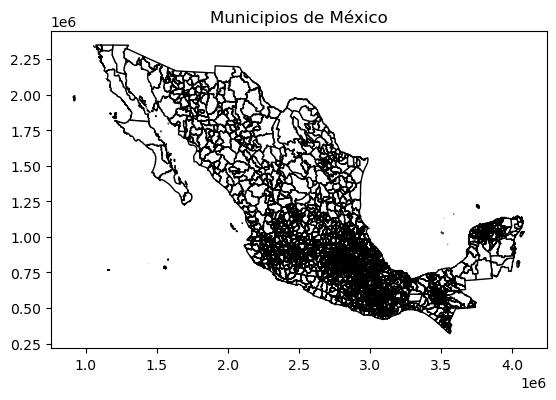

In [80]:
ax = areas.plot(
    color='white', edgecolor='black')
#ax.set_aspect('equal')
#gdf.plot(ax=ax, color='red')
plt.title("Municipios de México")
plt.show()

In [ ]:
"""# restringir a solo areas urbanas
ax = areas[areas.Ambito == 'Urbana'].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')
plt.title("Zonas urbanas")
plt.show()
"""

## SUN municipios

In [216]:
#url = 'https://raw.githubusercontent.com/gperaza/segregation/master/data/Base_SUN_2018.csv'
SUN = pd.read_csv('Base_SUN.csv')
SUN.head(5)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,CVE_LOC,NOM_LOC,CVE_SUN,NOM_SUN,POB_2018
0,1,Aguascalientes,1011,San Francisco de los Romo,NaN,NaN,M01.01,Aguascalientes,42531
1,1,Aguascalientes,1005,Jes�s Mar�a,NaN,NaN,M01.01,Aguascalientes,116700
2,1,Aguascalientes,1001,Aguascalientes,NaN,NaN,M01.01,Aguascalientes,897331
3,2,Baja California,2005,Playas de Rosarito,NaN,NaN,M02.03,Tijuana,110683
4,2,Baja California,2003,Tecate,NaN,NaN,M02.03,Tijuana,115570


In [217]:
SUN.shape

(1089, 9)

## Uniendo mapa geoestadistíco al sistema urbano nacional ycensos para crear geojsnon

In [218]:
#Uniendo mapa geoestadistíco al sistema urbano nacional
mun = pd.merge(areas, SUN, left_on = 'CVEGEO', right_on = 'CVE_MUN')

In [219]:
mun.head()

,CVEGEO,CVE_ENT_x,CVE_MUN_x,NOMGEO,geometry,CVE_ENT_y,NOM_ENT,CVE_MUN_y,NOM_MUN,CVE_LOC,NOM_LOC,CVE_SUN,NOM_SUN,POB_2018
0,1001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774...",1,Aguascalientes,1001,Aguascalientes,NaN,NaN,M01.01,Aguascalientes,897331
1,1003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902...",1,Aguascalientes,1003,Calvillo,10030001.0,Calvillo,P01.01,Calvillo,21774
2,1005,01,005,Jesús María,"POLYGON ((2465526.729 1114740.466, 2465752.546...",1,Aguascalientes,1005,Jes�s Mar�a,NaN,NaN,M01.01,Aguascalientes,116700
3,1006,01,006,Pabellón de Arteaga,"POLYGON ((2473996.656 1129304.114, 2474217.810...",1,Aguascalientes,1006,Pabell�n de Arteaga,10060001.0,Pabell�n de Arteaga,P01.02,Pabell�n de Arteaga,30720
4,1007,01,007,Rincón de Romos,"POLYGON ((2476760.231 1150329.045, 2476783.634...",1,Aguascalientes,1007,Rinc�n de Romos,10070001.0,Rinc�n de Romos,C01.01,Rinc�n de Romos,30969


In [220]:
mun.shape

(1089, 14)

In [221]:
mun = pd.merge(datos90, mun, how = "right", left_on = 'CVE_MUN90', right_on = 'CVEGEO')

In [222]:
mun.head()

,nom_mun,POBTOT90,CVE_MUN90,CVEGEO,CVE_ENT_x,CVE_MUN_x,NOMGEO,geometry,CVE_ENT_y,NOM_ENT,CVE_MUN_y,NOM_MUN,CVE_LOC,NOM_LOC,CVE_SUN,NOM_SUN,POB_2018
0,Aguascalientes,506274.0,1001.0,1001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774...",1,Aguascalientes,1001,Aguascalientes,NaN,NaN,M01.01,Aguascalientes,897331
1,Calvillo,48440.0,1003.0,1003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902...",1,Aguascalientes,1003,Calvillo,10030001.0,Calvillo,P01.01,Calvillo,21774
2,Jesús María,41092.0,1005.0,1005,01,005,Jesús María,"POLYGON ((2465526.729 1114740.466, 2465752.546...",1,Aguascalientes,1005,Jes�s Mar�a,NaN,NaN,M01.01,Aguascalientes,116700
3,Pabellón de Arteaga,26051.0,1006.0,1006,01,006,Pabellón de Arteaga,"POLYGON ((2473996.656 1129304.114, 2474217.810...",1,Aguascalientes,1006,Pabell�n de Arteaga,10060001.0,Pabell�n de Arteaga,P01.02,Pabell�n de Arteaga,30720
4,Rincón de Romos,33781.0,1007.0,1007,01,007,Rincón de Romos,"POLYGON ((2476760.231 1150329.045, 2476783.634...",1,Aguascalientes,1007,Rinc�n de Romos,10070001.0,Rinc�n de Romos,C01.01,Rinc�n de Romos,30969


In [223]:
mun.shape

(1089, 17)

In [224]:
mun = pd.merge(datos2000, mun, how = "right", left_on = 'CVE_MUN2000', right_on = 'CVEGEO')

In [225]:
mun.head()

,nom_mun_x,POBTOT2000,CVE_MUN2000,nom_mun_y,POBTOT90,CVE_MUN90,CVEGEO,CVE_ENT_x,CVE_MUN_x,NOMGEO,geometry,CVE_ENT_y,NOM_ENT,CVE_MUN_y,NOM_MUN,CVE_LOC,NOM_LOC,CVE_SUN,NOM_SUN,POB_2018
0,Aguascalientes,643419,1001.0,Aguascalientes,506274.0,1001.0,1001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774...",1,Aguascalientes,1001,Aguascalientes,NaN,NaN,M01.01,Aguascalientes,897331
1,Calvillo,51291,1003.0,Calvillo,48440.0,1003.0,1003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902...",1,Aguascalientes,1003,Calvillo,10030001.0,Calvillo,P01.01,Calvillo,21774
2,Jesús María,64097,1005.0,Jesús María,41092.0,1005.0,1005,01,005,Jesús María,"POLYGON ((2465526.729 1114740.466, 2465752.546...",1,Aguascalientes,1005,Jes�s Mar�a,NaN,NaN,M01.01,Aguascalientes,116700
3,Pabellón de Arteaga,34296,1006.0,Pabellón de Arteaga,26051.0,1006.0,1006,01,006,Pabellón de Arteaga,"POLYGON ((2473996.656 1129304.114, 2474217.810...",1,Aguascalientes,1006,Pabell�n de Arteaga,10060001.0,Pabell�n de Arteaga,P01.02,Pabell�n de Arteaga,30720
4,Rincón de Romos,41655,1007.0,Rincón de Romos,33781.0,1007.0,1007,01,007,Rincón de Romos,"POLYGON ((2476760.231 1150329.045, 2476783.634...",1,Aguascalientes,1007,Rinc�n de Romos,10070001.0,Rinc�n de Romos,C01.01,Rinc�n de Romos,30969


In [226]:
mun.shape

(1089, 20)

In [227]:
mun = pd.merge(datos2010, mun, how = "right", left_on = 'CVE_MUN2010', right_on = 'CVEGEO')

In [228]:
mun.head()

,nom_mun,POBTOT2010,CVE_MUN2010,nom_mun_x,POBTOT2000,CVE_MUN2000,nom_mun_y,POBTOT90,CVE_MUN90,CVEGEO,...,geometry,CVE_ENT_y,NOM_ENT,CVE_MUN_y,NOM_MUN,CVE_LOC,NOM_LOC,CVE_SUN,NOM_SUN,POB_2018
0,Aguascalientes,797010,1001,Aguascalientes,643419,1001.0,Aguascalientes,506274.0,1001.0,1001,...,"POLYGON ((2489072.503 1115771.584, 2489352.774...",1,Aguascalientes,1001,Aguascalientes,NaN,NaN,M01.01,Aguascalientes,897331
1,Calvillo,54136,1003,Calvillo,51291,1003.0,Calvillo,48440.0,1003.0,1003,...,"POLYGON ((2429607.454 1120262.254, 2429071.902...",1,Aguascalientes,1003,Calvillo,10030001.0,Calvillo,P01.01,Calvillo,21774
2,Jesús María,99590,1005,Jesús María,64097,1005.0,Jesús María,41092.0,1005.0,1005,...,"POLYGON ((2465526.729 1114740.466, 2465752.546...",1,Aguascalientes,1005,Jes�s Mar�a,NaN,NaN,M01.01,Aguascalientes,116700
3,Pabellón de Arteaga,41862,1006,Pabellón de Arteaga,34296,1006.0,Pabellón de Arteaga,26051.0,1006.0,1006,...,"POLYGON ((2473996.656 1129304.114, 2474217.810...",1,Aguascalientes,1006,Pabell�n de Arteaga,10060001.0,Pabell�n de Arteaga,P01.02,Pabell�n de Arteaga,30720
4,Rincón de Romos,49156,1007,Rincón de Romos,41655,1007.0,Rincón de Romos,33781.0,1007.0,1007,...,"POLYGON ((2476760.231 1150329.045, 2476783.634...",1,Aguascalientes,1007,Rinc�n de Romos,10070001.0,Rinc�n de Romos,C01.01,Rinc�n de Romos,30969


In [229]:
mun.shape

(1089, 23)

In [230]:
mun = pd.merge(datos2020, mun, how = "right", left_on = 'CVE_MUN2020', right_on = 'CVEGEO')

In [231]:
mun.head()

,NOM_MUN_x,NOM_LOC_x,POBTOT2020,geometry_x,CVE_MUN2020,LATITUD,LONGITUD,nom_mun,POBTOT2010,CVE_MUN2010,...,geometry_y,CVE_ENT_y,NOM_ENT,CVE_MUN_y,NOM_MUN_y,CVE_LOC,NOM_LOC_y,CVE_SUN,NOM_SUN,POB_2018
0,Aguascalientes,Total del Municipio,948990,POINT (21.880 -102.296),1001,21.879823,-102.296047,Aguascalientes,797010,1001,...,"POLYGON ((2489072.503 1115771.584, 2489352.774...",1,Aguascalientes,1001,Aguascalientes,NaN,NaN,M01.01,Aguascalientes,897331
1,Calvillo,Total del Municipio,58250,POINT (21.847 -102.719),1003,21.846907,-102.718751,Calvillo,54136,1003,...,"POLYGON ((2429607.454 1120262.254, 2429071.902...",1,Aguascalientes,1003,Calvillo,10030001.0,Calvillo,P01.01,Calvillo,21774
2,Jesús María,Total del Municipio,129929,POINT (21.961 -102.343),1005,21.961273,-102.343416,Jesús María,99590,1005,...,"POLYGON ((2465526.729 1114740.466, 2465752.546...",1,Aguascalientes,1005,Jes�s Mar�a,NaN,NaN,M01.01,Aguascalientes,116700
3,Pabellón de Arteaga,Total del Municipio,47646,POINT (22.149 -102.277),1006,22.149202,-102.276542,Pabellón de Arteaga,41862,1006,...,"POLYGON ((2473996.656 1129304.114, 2474217.810...",1,Aguascalientes,1006,Pabell�n de Arteaga,10060001.0,Pabell�n de Arteaga,P01.02,Pabell�n de Arteaga,30720
4,Rincón de Romos,Total del Municipio,57369,POINT (22.229 -102.323),1007,22.229233,-102.323069,Rincón de Romos,49156,1007,...,"POLYGON ((2476760.231 1150329.045, 2476783.634...",1,Aguascalientes,1007,Rinc�n de Romos,10070001.0,Rinc�n de Romos,C01.01,Rinc�n de Romos,30969


In [232]:
mun.shape

(1089, 30)

In [266]:
mun = mun[['CVEGEO','nom_mun', 'geometry_y', 'LATITUD', 'LONGITUD', 'POBTOT90', 'POBTOT2000', 'POBTOT2010', 'POB_2018', 'POBTOT2020','CVE_SUN', 'NOM_SUN']]

In [267]:
mun.tail()

,CVEGEO,nom_mun,geometry_y,LATITUD,LONGITUD,POBTOT90,POBTOT2000,POBTOT2010,POB_2018,POBTOT2020,CVE_SUN,NOM_SUN
1084,32057,Trancoso,"POLYGON ((2476976.320 1198274.003, 2476566.139...",22.735389,-102.366038,NaN,13080,16934,18421,20455,M32.01,Zacatecas-Guadalupe
1085,32042,Sombrerete,"POLYGON ((2323169.164 1339064.340, 2323132.624...",23.631378,-103.641342,63546.0,61652,61188,25232,63665,P32.08,Sombrerete
1086,32048,Tlaltenango de Sánchez Román,"POLYGON ((2381613.984 1100593.990, 2381728.349...",21.783042,-103.305813,22987.0,23456,25493,17098,27302,P32.09,Tlaltenango de S�nchez Rom�n
1087,32050,Vetagrande,"POLYGON ((2458171.353 1215509.214, 2458178.469...",22.832815,-102.555642,6559.0,7228,9353,10320,10276,M32.01,Zacatecas-Guadalupe
1088,32056,Zacatecas,"POLYGON ((2421707.751 1202019.971, 2421780.086...",22.776096,-102.571836,108556.0,123899,138176,147957,149607,M32.01,Zacatecas-Guadalupe


In [268]:
mun.shape

(1089, 12)

In [269]:
gdf2 = gpd.GeoDataFrame(
    mun, geometry='geometry_y')

In [270]:
gdf2.dtypes

CVEGEO           int64
nom_mun         object
geometry_y    geometry
LATITUD        float64
LONGITUD       float64
POBTOT90       float64
POBTOT2000      object
POBTOT2010      object
POB_2018         int64
POBTOT2020      object
CVE_SUN         object
NOM_SUN         object
dtype: object

In [271]:
convert_dict = {'POBTOT90': float,
                'POBTOT2000': float,
                'POBTOT2010': float,
                'POBTOT2020': float,
                }
 
gdf2 = gdf2.astype(convert_dict)

In [272]:
with open('municipios.geojson' , 'w') as file:
    file.write(gdf2.to_json())

In [273]:
#path = "municipios.geojson"
#gdf2.to_file(path, driver="GeoJSON")  